<a href="https://colab.research.google.com/github/zFSANTANDER/CH_PCNA/blob/master/CH_PCNA_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
#Cargar datasets para entrenamiento
#print(os.getcwd())
#print(os.listdir())
X_mean=[]
X_Orig = pd.read_csv('/content/X_Train_Jul2019.csv',delimiter=';',engine='python')
Y_Orig = pd.read_csv('/content/Y_Train_Jul2019.csv',delimiter=';',engine='python')
#print(np.sum(X_Train.isnull()))
X_Orig=X_Orig.values
Y_Orig=Y_Orig.values
X_Orig=X_Orig.astype(np.float).T
Y_Orig=Y_Orig.astype(np.float).T
X_Orig=np.delete(X_Orig,53,0)

print("La dimension de set de datos de entrada es: ",X_Orig.shape)
print("La dimension de set de datos de salida es: ",Y_Orig.shape)

La dimension de set de datos de entrada es:  (53, 9904)
La dimension de set de datos de salida es:  (1, 9904)


In [14]:
X_max=np.zeros((X_Orig.shape[0],1))
X_min=np.zeros((X_Orig.shape[0],1))

mean=np.reshape(np.mean(X_Orig,axis=1),(53,1),order='F')
var=np.reshape(np.var(X_Orig,axis=1),(53,1),order='F')
devstd=np.reshape(np.std(X_Orig,axis=1),(53,1),order='F')

cont=X_Orig.shape[0]
sample_cont=X_Orig.shape[1]

train_cont=int(np.round(sample_cont*0.7))
test_cont=int(np.round((sample_cont-1)*0.15))
dev_cont=int(np.round((sample_cont-1)*0.15))
i=0
for i in range(cont):
        X_max[i]=np.max(X_Orig[[i]])
        X_min[i]=np.min(X_Orig[[i]])

X_gain=X_max-X_min
X_norm=np.divide(X_Orig-X_min,X_gain)
X_std=np.divide((X_Orig-mean),devstd)
print(X_std.shape)
print(Y_Orig.shape)
#X_std, Y_Orig = shuffle(X_std.T, Y_Orig.T)
#X_std=X_std.T
#Y_Orig=Y_Orig.T
X_train=X_std[:,1:train_cont]
Y_train=Y_Orig[:,1:train_cont]
X_test=X_std[:,train_cont+1:test_cont+train_cont+1]
Y_test=Y_Orig[:,train_cont+1:test_cont+train_cont+1]
X_dev=X_std[:,test_cont+train_cont+1:dev_cont+test_cont+train_cont+1]
Y_dev=Y_Orig[:,test_cont+train_cont+1:dev_cont+test_cont+train_cont+1]


print("La dimension de los datos originales es",X_Orig.shape)
print("La dimension de los datos normalizados es",X_norm.shape)
print("La dimension de los datos estandarizados es",X_std.shape)
print("La dimension de los datos entrenamiento es",X_train.shape)
print("La dimension de los datos test es",X_test.shape)
print("La dimension de los datos dev es",X_dev.shape)

(53, 9904)
(1, 9904)
La dimension de los datos originales es (53, 9904)
La dimension de los datos normalizados es (53, 9904)
La dimension de los datos estandarizados es (53, 9904)
La dimension de los datos entrenamiento es (53, 6932)
La dimension de los datos test es (53, 1485)
La dimension de los datos dev es (53, 1485)


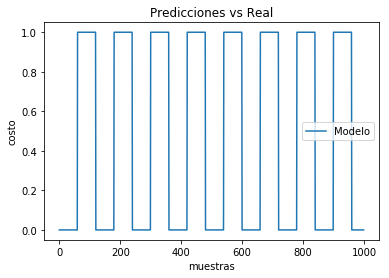

In [17]:
plt.plot(np.squeeze(Y_Orig[:,0:1000]), label='Modelo')
plt.ylabel('costo')
plt.xlabel('muestras')
plt.title("Predicciones vs Real")
plt.legend()
plt.show()

In [0]:
inputs = keras.Input(shape=(53,), name='digits')
x = layers.Dense(53, activation='sigmoid', name='dense_1')(inputs)
x = layers.Dense(53, activation='sigmoid', name='dense_2')(x)
outputs = layers.Dense(1, activation='sigmoid', name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
%%capture
print(X_train.shape)
print(Y_train.shape)
history = model.fit(X_train.T, Y_train.T,
                    batch_size=64,
                    epochs=100,
                    validation_data=(X_test.T, Y_test.T))


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


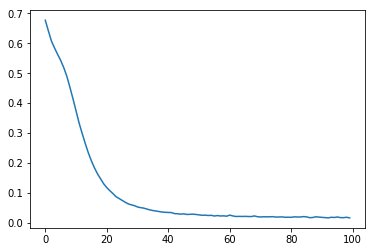

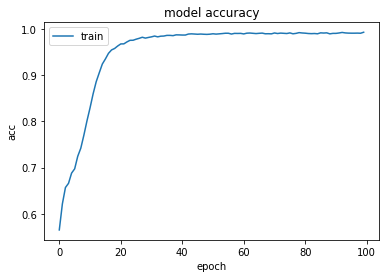

In [75]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.show()
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

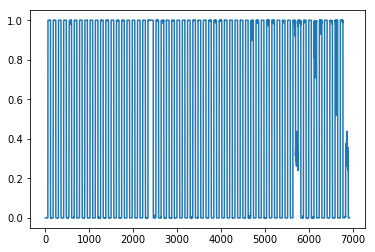

In [114]:
Y_pred = model.predict(X_train.T)
plt.plot(Y_pred)
plt.show()